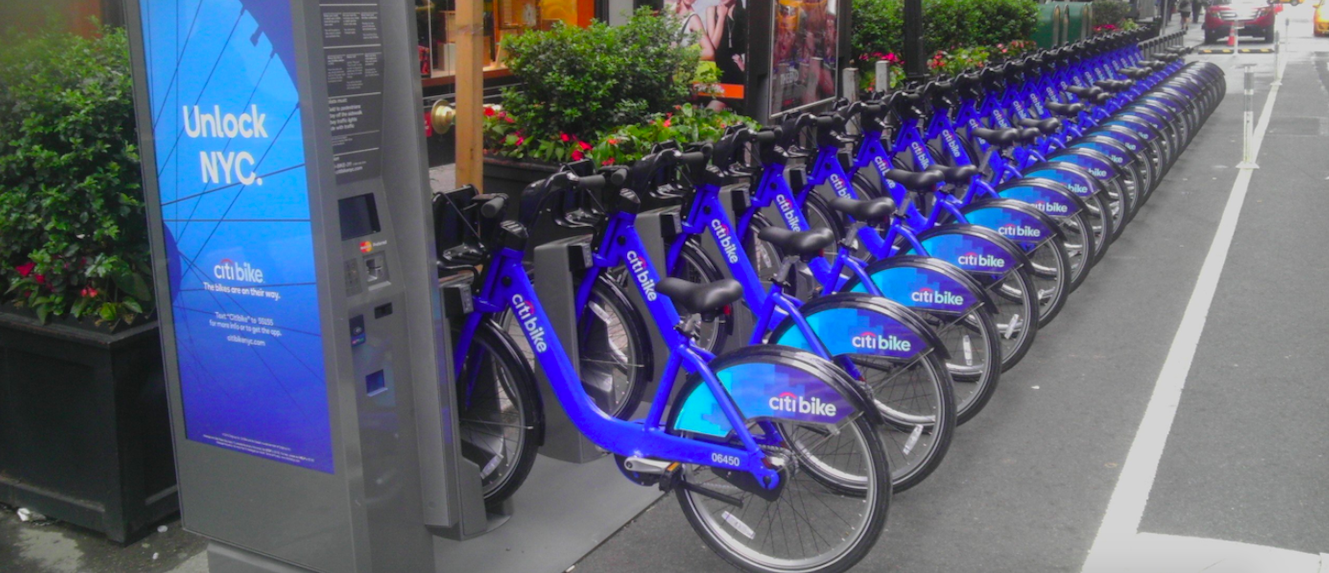
# Bikeshare 
## User Statistics
### Chicago - New York - Washington


### Table of Contents
###### Chapter 1 - The Project
###### Chapter 2 - The Resources
###### Chapter 3 - The Model

# The Project

###### For this project we will be looking at user data for bikeshare services from the following cities - Chicago, New York, and Washington. 

###### With the aquired data, we will be able to compute popular travel times, stations and trips, trip durations, and access basic user info.

###### It is important to note the following data only covers the first six-months (January-June) of 2017. User info with regaurds to gender and date of birth is only available for New York City and Chicago.

###### We hope you enjoy!

# The Resources

###### The data used for this project was retrieved from the bike share system provider, Motivate.

###### The data is divided into the following six catigories and will be desplayed as follows:

###### - Start Time (e.g., 2017-01-01 00:07:57)
###### - End Time (e.g., 2017-01-01 00:20:53)
###### - Trip Duration (in seconds - e.g., 776)
###### - Start Station (e.g., Broadway & Barry Ave)
###### - End Station (e.g., Sedgwick St & North Ave)
###### - User Type (Subscriber or Customer)

###### The Chicago and New York City files also have the following two columns:

###### - Gender
###### - Birth Year


# The Model

In [1]:
# IMPORTED LIBRARIES
import time
import pandas as pd
import numpy as np
from IPython.display import clear_output

In [2]:
CITY_DATA = { 'chicago': 'chicago.csv',
              'new york': 'new_york_city.csv',
              'washington': 'washington.csv' }

In [3]:
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.
    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """

    print('Hello! Let\'s explore some US bikeshare data!')
    # GETS USER INPUT FOR CITY (CHICAGO, NEW YORK, WASHINGTON)
    city = input('Please choose one of the following cities: Chicago, New York, Washington: ').lower()
    while city not in(CITY_DATA.keys()):
        clear_output()
        print('Sorry, your input was not accepted.')
        city = input('Please select one of the following cities: Chicago, New York, or Washington. ').lower()

    # GETS USER INPUT FOR MONTH (ALL, JANUARY, FEBRUARY, ... , JUNE)
    months = ['all','january', 'february', 'march', 'april', 'may', 'june']
    month = input('Please select one of the following months: All, January, February, March, April, May, June. ').lower()
    while month not in months:
        clear_output()
        print('Sorry, your input was not accepted.')
        month = input('Please select one of the following months: All, January, February, March, April, May, June. ').lower()
    else:
        month = 'all'


    # get user input for day of week (all, monday, tuesday, ... sunday)
    days = [ 'All', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day = input('Please select one of the following:  All, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday. ').title()
    while day not in days:
        clear_output()
        print('Sorry, your input was not accepted.')
        day = input('Please select one of the following: All, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday. ').title()
    else:
        day = 'all'
    print('-'*40)
    return city, month, day

In [4]:
def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.
    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city])

    # CONVERTS THE START TIME COLUMN TO DATETIME
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # EXTRACTS MONTH AND DAY OF THE WEEK FROM START TIME TO CREATE NEW COLUMNS
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.day_name()
    
    
        # FILTERS BY MONTH IF APPLICABLE
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1
        print(month)
        # FILTERS BY MONTH TO CREATE THE NEW DATAFRAME
        df = df[df['month'] == month]

    # FILTERS BY DAY OF THE WEEK IF APPLICABLE
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]


    return df


In [5]:
def time_stats(df):
    """Displays statistics on the most frequent times of travel."""
    

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # DISPLAYS MOST COMMON MONTH
    months = ['january', 'february', 'march', 'april', 'may', 'june']
    month = df['month'].mode()[0]
    print('Most common month: {}'.format(months[month-1].title()))

    # DISPLAYS MOST COMMON DAY OF THE WEEK
    day = df['day_of_week'].mode()[0]
    print('Most common day of the week: {}'.format(day))

    # DISPLAYS MOST COMMON START HOUR
    df['Start Time'] = pd.to_datetime(df['Start Time']) 
    df['hour'] = df['Start Time'].dt.hour
    popular_hour = df['hour'].mode()[0]
    print('Most common start hour: {}:00'.format(popular_hour))


    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [6]:
def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # DISPLAYS MOST COMMONLY USED START STATION
    most_common_start_station = df['Start Station'].mode()[0]
    print('The most commonly used start station is: {}'.format(most_common_start_station))


    # DISPLAYS MOST COMMONLY USED END STATION
    most_common_end_station = df['End Station'].mode()[0]
    print('The most commonly used end station is: {}'.format(most_common_end_station))


    # DISPLAYS MOST FREQUENT COMBINATION OF START AND END STATION TRIP
    most_common_trip = df['Start Station'].mode()[0] + ' to ' + df['End Station'].mode()[0]
    print('The most common trip from start to end station is: {}'.format(most_common_trip))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [7]:
def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # DISPLAYS TOTAL TRAVEL TIME
    total_travel_time = (pd.to_datetime(df['End Time'])-pd.to_datetime(df['Start Time'])).sum()
    days = total_travel_time.days 
    hours = total_travel_time.seconds // (60*60)
    minutes = total_travel_time.seconds % (60*60) // 60
    seconds = total_travel_time.seconds % (60*60) % 60
    print('The total travel time is: {} days, {} hours, {} minutes, {} seconds'.format(days, hours, minutes, seconds))


    # DISPLAYS MEAN TRAVEL TIME
    average_travel_time = (pd.to_datetime(df['End Time']) - pd.to_datetime(df['Start Time'])).mean()
    days = average_travel_time.days 
    hours = average_travel_time.seconds // (60*60)
    minutes = average_travel_time.seconds % (60*60) // 60
    seconds = average_travel_time % (60*60) % 60
    print('The average travel time is: {} days, {} hours, {} minutes, {} seconds'.format(days, hours, minutes, seconds))


    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [8]:
def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # DISPLAY COUNTS OF USER TYPE
    print(df['User Type'].value_counts())
    print('\n\n')

    # DISPLAY COUNTS OF GENDER
    if 'Gender' in(df.columns):
        print(df['Gender'].value_counts())
        print('\n\n')


    # DISPLAY EARLIEST, MOST RECENT, AND MOST COMMON YEAR OF BIRTH
    if 'Birth Year' in(df.columns):
        year = df['Birth Year'].fillna(method='pad').astype('int64')
        print(f'The earliest year of birth is {year.min()}\nThe most recent year of birth is {year.max()}\nThe most common year of birth is {year.mode()[0]}')

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [9]:
def display_raw_data(df):
    """Ask the user if he wants to display the raw data and print 5 rows at time"""
    raw_data = input('Would you like to display raw data? (Yes or No): ').lower()
    if raw_data == 'yes':
        count = 0
        while True:
            print(df.iloc[count: count+5])
            count += 5
            show_more = input('Would you like to see the next 5 rows? Enter Yes or No)').lower()
            if show_more != 'yes':
                break

In [10]:
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)


        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        display_raw_data(df)
        restart = input('Would you like to restart? Enter yes or no.').lower()
        if restart != 'yes':
            print("Thank you, we hope you enjoyed!")
            break

            
            
if __name__ == "__main__":
    main()

Hello! Let's explore some US bikeshare data!
Please choose one of the following cities: Chicago, New York, Washington: chicago
Please select one of the following months: All, January, February, March, April, May, June. all
Please select one of the following:  All, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday. all
----------------------------------------

Calculating The Most Frequent Times of Travel...

Most common month: June
Most common day of the week: Tuesday
Most common start hour: 17:00

This took 0.059868812561035156 seconds.
----------------------------------------

Calculating The Most Popular Stations and Trip...

The most commonly used start station is: Streeter Dr & Grand Ave
The most commonly used end station is: Streeter Dr & Grand Ave
The most common trip from start to end station is: Streeter Dr & Grand Ave to Streeter Dr & Grand Ave

This took 0.08650422096252441 seconds.
----------------------------------------

Calculating Trip Duration...

The tota